In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

# data Preprocessing 

In [11]:
#handling numerical missing data 
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#handle categorical missing data
df['Gender'].mode()[0]

'Male'

In [15]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


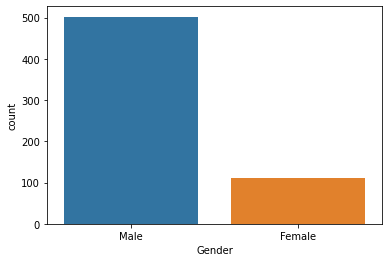

In [17]:
import seaborn as sns
sns.countplot(df['Gender'])
plt.show()

    



C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

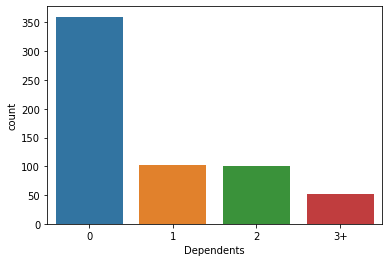

In [18]:
sns.countplot(df.Dependents)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

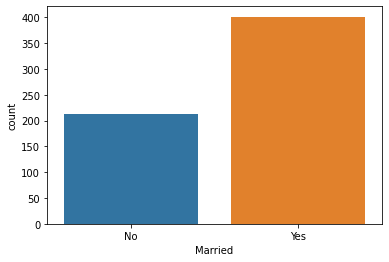

In [19]:
sns.countplot(df.Married)

In [20]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

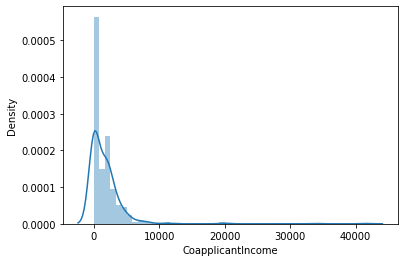

In [21]:
sns.distplot(df.CoapplicantIncome)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

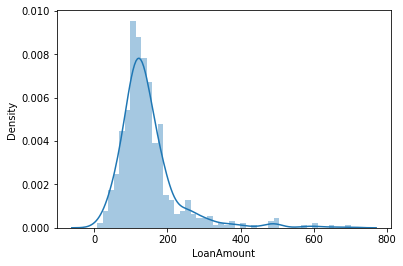

In [22]:
sns.distplot(df.LoanAmount)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

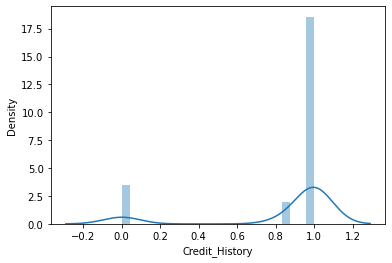

In [24]:
sns.distplot(df.Credit_History)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [122]:
#data transformation


In [28]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'])

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomelog', ylabel='Density'>

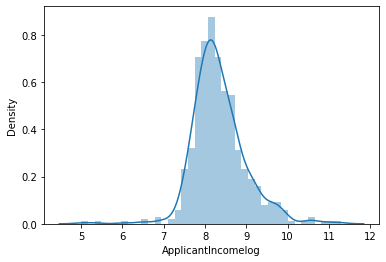

In [29]:
sns.distplot(df.ApplicantIncomelog)

In [30]:
df['CoApplicantIncomelog'] = np.log(df['CoapplicantIncome'])
df['CoApplicantIncomelog'] = df['CoApplicantIncomelog'].replace(-np.infty, np.nan)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
df['CoApplicantIncomelog']= df['CoApplicantIncomelog'].fillna(df['CoApplicantIncomelog'].median())

In [32]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Total_Income            0
ApplicantIncomelog      0
CoApplicantIncomelog    0
dtype: int64

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoApplicantIncomelog', ylabel='Density'>

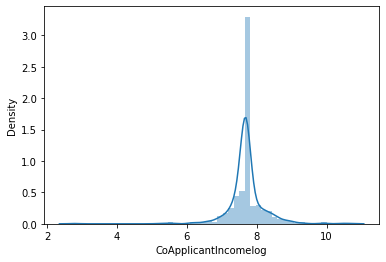

In [33]:
sns.distplot(df.CoApplicantIncomelog)

In [34]:
df['LoanAmountlog'] = np.log(df['LoanAmount'])

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountlog', ylabel='Density'>

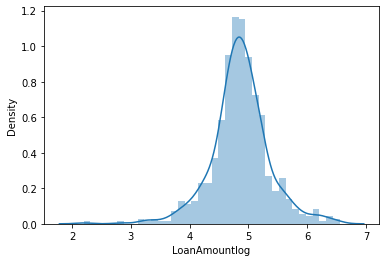

In [35]:
sns.distplot(df.LoanAmountlog)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountTermlog', ylabel='Density'>

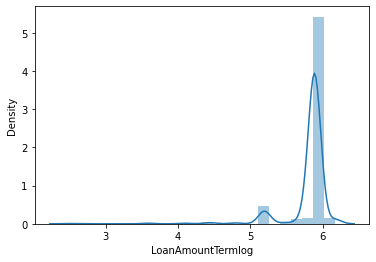

In [36]:
df['LoanAmountTermlog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df.LoanAmountTermlog)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncomelog', ylabel='Density'>

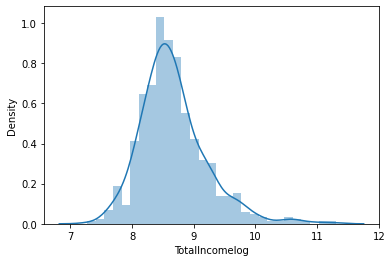

In [37]:
df['TotalIncomelog'] = np.log(df['Total_Income'])
sns.distplot(df.TotalIncomelog)

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,CoApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,7.680637,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,7.680637,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,7.680637,4.948760,5.886104,8.699515


In [39]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoApplicantIncomelog']
df1 = df.drop(columns = cols,axis =1)

In [85]:
df2 = df.drop(columns = cols,axis =1)

In [86]:
df2.Credit_History.value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [40]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [41]:
df1.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [41]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

# handling categoical data 

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Credit_History      614 non-null    float64
 6   Property_Area       614 non-null    object 
 7   Loan_Status         614 non-null    object 
 8   ApplicantIncomelog  614 non-null    float64
 9   LoanAmountlog       614 non-null    float64
 10  LoanAmountTermlog   614 non-null    float64
 11  TotalIncomelog      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [43]:
d1 = pd.get_dummies(df1['Gender'],drop_first = True)
d2 = pd.get_dummies(df1['Married'],drop_first = True)
d3= pd.get_dummies(df1['Dependents'],drop_first = True)
d4 = pd.get_dummies(df1['Education'],drop_first = True)
d5 = pd.get_dummies(df1['Self_Employed'],drop_first = True)
d6 = pd.get_dummies(df1['Property_Area'],drop_first = True)
df1 =pd.concat([df1,d1,d2,d3,d4,d5,d6],axis=1)
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df1= df1.drop(columns =cols,axis=1)

In [44]:
df1.head()

,Credit_History,Loan_Status,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Credit_History      614 non-null    float64
 1   Loan_Status         614 non-null    object 
 2   ApplicantIncomelog  614 non-null    float64
 3   LoanAmountlog       614 non-null    float64
 4   LoanAmountTermlog   614 non-null    float64
 5   TotalIncomelog      614 non-null    float64
 6   Male                614 non-null    uint8  
 7   Yes                 614 non-null    uint8  
 8   1                   614 non-null    uint8  
 9   2                   614 non-null    uint8  
 10  3+                  614 non-null    uint8  
 11  Not Graduate        614 non-null    uint8  
 12  Yes                 614 non-null    uint8  
 13  Semiurban           614 non-null    uint8  
 14  Urban               614 non-null    uint8  
dtypes: float64(5), object(1), uint8(9)
memory usage: 34.3+ KB

In [46]:
df1.describe()

,Credit_History,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842199,8.341213,4.862066,5.802065,8.669414,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,0.349681,0.645263,0.496575,0.312482,0.545102,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,0.000000,5.010635,2.197225,2.484907,7.273786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.964677,4.607658,5.886104,8.334712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.246040,4.859812,5.886104,8.597205,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.664750,5.104426,5.886104,8.925549,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302204,6.551080,6.173786,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
#testdatasets


In [47]:
test = pd.read_csv('test.csv')

In [48]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
#fill numerical data with mean
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())

In [51]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [52]:
#filling categorical missing data 
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents']= test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [53]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276


In [54]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_income         0
dtype: int64

In [55]:
#tranform numerical to normal distribution

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomelog', ylabel='Density'>

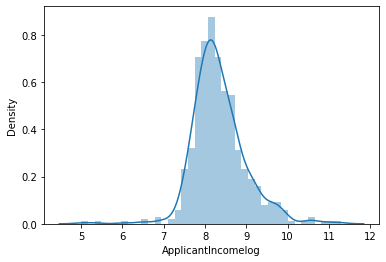

In [55]:
test['ApplicantIncomelog'] = np.log(test['ApplicantIncome'])
sns.distplot(df.ApplicantIncomelog)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountlog', ylabel='Density'>

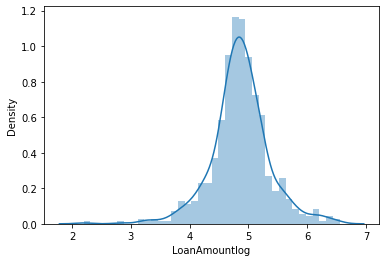

In [56]:
test['LoanAmountlog'] = np.log(test['LoanAmount'])
sns.distplot(df.LoanAmountlog)


C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountTermlog', ylabel='Density'>

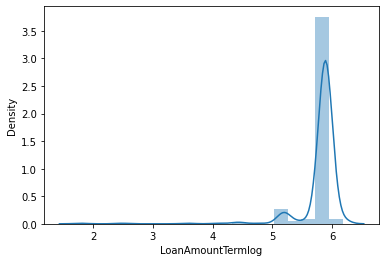

In [57]:
test['LoanAmountTermlog'] = np.log(test['Loan_Amount_Term'])
sns.distplot(test.LoanAmountTermlog)


C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncomelog', ylabel='Density'>

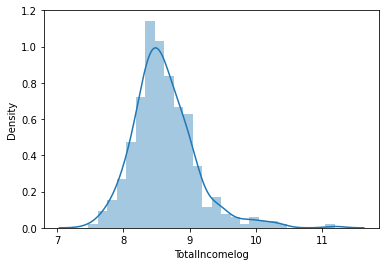

In [156]:
test['TotalIncomelog'] = np.log(test['Total_income'])
sns.distplot(test.TotalIncomelog)

In [58]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Loan_ID']
df2 = test.drop(columns = cols,axis =1)

In [59]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog
0,Male,Yes,0,Graduate,No,1.000000,Urban,8.651724,4.700480,5.886104
1,Male,Yes,1,Graduate,No,1.000000,Urban,8.031385,4.836282,5.886104
2,Male,Yes,2,Graduate,No,1.000000,Urban,8.517193,5.337538,5.886104
3,Male,Yes,2,Graduate,No,0.825444,Urban,7.757906,4.605170,5.886104
4,Male,No,0,Not Graduate,No,1.000000,Urban,8.094378,4.356709,5.886104


In [60]:
d1 = pd.get_dummies(df2['Gender'],drop_first = True)
d2 = pd.get_dummies(df2['Married'],drop_first = True)
d3= pd.get_dummies(df2['Dependents'],drop_first = True)
d4 = pd.get_dummies(df2['Education'],drop_first = True)
d5 = pd.get_dummies(df2['Self_Employed'],drop_first = True)
d6 = pd.get_dummies(df2['Property_Area'],drop_first = True)
df2=pd.concat([df2,d1,d2,d3,d4,d5,d6],axis=1)
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df2= df2.drop(columns =cols,axis=1)

In [61]:
df2.head()

,Credit_History,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,1,0,0,0,0,1,0,0,1


# train test split

In [62]:
#specify input and output attributes
x = df1.drop(columns=['Loan_Status'],axis=1)
y = df1['Loan_Status']

In [63]:
x.head()

,Credit_History,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [64]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [65]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =42)

In [66]:
x_train

,Credit_History,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
92,1.0,8.093462,4.394449,5.886104,8.535622,1,1,0,1,0,1,0,0,1
304,1.0,8.294050,4.941642,5.886104,8.779557,1,0,0,0,0,0,0,0,0
68,1.0,8.867850,4.828314,4.094345,8.867850,1,1,0,0,1,1,1,0,1
15,1.0,8.507143,4.828314,5.886104,8.507143,1,0,0,0,0,0,0,0,1
211,0.0,8.140316,4.852030,5.886104,8.451053,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,7.536364,4.574711,5.886104,8.229511,1,1,0,1,0,1,1,1,0
106,1.0,9.342859,5.416100,5.886104,9.436918,1,1,0,1,0,0,0,0,1
270,1.0,8.082402,3.401197,5.886104,8.082402,0,0,0,0,0,0,0,0,1
435,1.0,9.215029,4.986426,5.480639,9.215029,0,1,0,0,0,0,0,1,0


In [67]:
y_train

92     Y
304    Y
68     Y
15     Y
211    N
      ..
71     Y
106    Y
270    Y
435    Y
102    Y
Name: Loan_Status, Length: 460, dtype: object

# Model Training

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print('accuracy of rf is  ',accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

accuracy of rf is   0.7727272727272727
              precision    recall  f1-score   support

           N       0.88      0.41      0.56        54
           Y       0.75      0.97      0.85       100

    accuracy                           0.77       154
   macro avg       0.82      0.69      0.70       154
weighted avg       0.80      0.77      0.75       154



In [70]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
logpredictions = logmodel.predict(x_test)

C:\Users\sumit joshi\anaconda3\envs\flaskappdemo\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
accuracy=accuracy_score(y_test,logpredictions)
print('accuracy of logistic regression is  ',accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,logpredictions))

accuracy of logistic regression is   0.7727272727272727
              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [72]:
#kneighbors 
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier()
kmodel.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
kpredictions = kmodel.predict(x_test)
accuracy=accuracy_score(y_test,kpredictions)
print('accuracy of kneighbors is  ',accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,kpredictions))

accuracy of kneighbors is   0.7012987012987013
              precision    recall  f1-score   support

           N       0.64      0.33      0.44        54
           Y       0.71      0.90      0.80       100

    accuracy                           0.70       154
   macro avg       0.68      0.62      0.62       154
weighted avg       0.69      0.70      0.67       154



In [74]:
from sklearn.naive_bayes import GaussianNB
gbmodel=GaussianNB()
gbmodel.fit(x_train,y_train)
gbpredictions = gbmodel.predict(x_test)

In [75]:
accuracy=accuracy_score(y_test,gbpredictions)
print('accuracy of kneighbors is  ',accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,gbpredictions))

accuracy of kneighbors is   0.7727272727272727
              precision    recall  f1-score   support

           N       0.88      0.41      0.56        54
           Y       0.75      0.97      0.85       100

    accuracy                           0.77       154
   macro avg       0.82      0.69      0.70       154
weighted avg       0.80      0.77      0.75       154



In [77]:
from sklearn.ensemble import GradientBoostingClassifier
Gmodel=GradientBoostingClassifier(n_estimators=280)
Gmodel.fit(x_train,y_train)
grpredictions=Gmodel.predict(x_test)

In [78]:
accuracy=accuracy_score(y_test,grpredictions)
print('accuracy of graident boosting is  ',accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,grpredictions))

accuracy of graident boosting is   0.7467532467532467
              precision    recall  f1-score   support

           N       0.73      0.44      0.55        54
           Y       0.75      0.91      0.82       100

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



In [79]:
import pickle 
file = open("modelnew.pkl",'wb')
pickle.dump(model,file)

In [ ]:
import mkl

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.20.3


In [3]:
import flask

In [4]:
print(flask.__version__)

2.0.1


In [5]:
import pandas as pd

In [6]:
print(pd. __version__ )

1.3.2


In [7]:
import sklearn

In [8]:
print(sklearn.__version__)

0.24.2


In [9]:
import matplotlib

In [10]:
print(matplotlib.__version__)

3.4.3
